# Character Level CNN for Sentiment Analysis

## Team

* Melisa Panaccione (40182167)
* Lucas Miquet-Westphal (40215325)
* Arpita Noul (40178343)

In [ ]:
# IMPORTANT: Kaggle download + basic imports
import kagglehub
import pandas as pd
from pathlib import Path

# Download latest version of the dataset
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")
print("Path to dataset files:", path)

data_dir = Path(path)


100%|██████████| 54.4M/54.4M [00:00<00:00, 91.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhi8923shriv/sentiment-analysis-dataset/versions/9


## Setup the data

### Import the data

Dataset: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data

In [ ]:
# Load train and test CSV files
train_data = pd.read_csv(data_dir / "train.csv", encoding="latin1")
test_data  = pd.read_csv(data_dir / "test.csv",  encoding="latin1")

# Combine them into a single DataFrame
df = pd.concat([train_data, test_data], ignore_index=True)

df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:
print(len(train_data))

27481


### Map inputs to targets

In [ ]:
inputs = []
targets = []

for _, row in df.iterrows():
    # Clean and normalize text
    text = str(row["text"]).strip().lower()
    characters = list(text)
    inputs.append(characters)

    # Map sentiment to a string label that we control
    raw_target = row["sentiment"]

    if isinstance(raw_target, str):
        label = raw_target.lower()
    else:
        # Handle numeric encodings
        if raw_target == 1:
            label = "positive"
        elif raw_target == 0:
            label = "negative"
        else:
            label = "neutral"

    targets.append(label)

print("Example inputs/targets:")
for i in range(3):
    print(f"{i}: {''.join(inputs[i][:60])!r} -> {targets[i]}")


Example inputs/targets:
0: 'i`d have responded, if i were going' -> neutral
1: 'sooo sad i will miss you here in san diego!!!' -> negative
2: 'my boss is bullying me...' -> negative


### Create one-hot-encodings

In [ ]:
character_list = list("abcdefghijklmnopqrstuvwxyz.!? 1234567890")

# One-hot encodings for each character
one_hot_characters = pd.get_dummies(character_list).astype(int)
mapping_characters = {
    ch: one_hot_characters.loc[i].values
    for i, ch in enumerate(character_list)
}

classes = ["positive", "neutral", "negative"]

# One-hot encodings for sentiment labels
one_hot_classes = pd.get_dummies(classes).astype(int)
mapping_classes = {
    label: one_hot_classes.loc[i].values
    for i, label in enumerate(classes)
}

mapping_characters, mapping_classes


({'a': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'b': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'c': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'd': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'e': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'f': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'g': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Create the CNN model

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


### Helper functions

In [ ]:
MAX_LEN = 1014
CHAR_DIM = len(character_list)

# Encode text into sequences of character vectors
encoded_inputs = []
for text in inputs:
    encoded_text = []
    for ch in text:
        if ch in mapping_characters:
            # Each character becomes a one-hot vector of length CHAR_DIM
            encoded_text.append(mapping_characters[ch])
    encoded_inputs.append(encoded_text)

# Encode labels into one-hot vectors
encoded_targets = []
for target in targets:
    if target in mapping_classes:
        encoded_targets.append(mapping_classes[target])
    else:
        encoded_targets.append(mapping_classes["neutral"])

y_array = np.stack(encoded_targets, axis=0).astype(np.float32)  # (N, 3)
y_tensor = torch.tensor(y_array, dtype=torch.float32)

def encode_and_pad_one(text_vecs, max_len=MAX_LEN, char_dim=CHAR_DIM):
    rows = []

    # Truncate
    for v in text_vecs[:max_len]:
        v = np.asarray(v, dtype=np.float32)
        rows.append(v)

    # Pad with zeros if shorter than MAX_LEN
    while len(rows) < max_len:
        rows.append(np.zeros(char_dim, dtype=np.float32))

    # Shape (max_len, char_dim) -> transpose to (char_dim, max_len)
    mat = np.stack(rows, axis=0)
    mat = mat.T
    return mat

# Build big X array: (N, CHAR_DIM, MAX_LEN)
X_list = [encode_and_pad_one(text_vecs) for text_vecs in encoded_inputs]
X_array = np.stack(X_list, axis=0).astype(np.float32)
X_tensor = torch.tensor(X_array, dtype=torch.float32)

print("X_tensor shape:", X_tensor.shape)
print("y_tensor shape:", y_tensor.shape)

X_tensor shape: torch.Size([32296, 40, 1014])
y_tensor shape: torch.Size([32296, 3])


### Inititalize the model

In [ ]:
class CNN(nn.Module):
    def __init__(self, dimensions, num_classes, input_length=1014):
        """
        A character-level CNN similar in spirit to Zhang et al. (2015).

        dimensions: embedding size (number of characters, e.g., 40)
        num_classes: number of sentiment classes (3: pos/neu/neg)
        input_length: sequence length (1014 chars)
        """
        super().__init__()

        # Convolution and pooling stack
        self.conv1 = nn.Conv1d(dimensions, 256, kernel_size=7)
        self.pool1 = nn.MaxPool1d(3)

        self.conv2 = nn.Conv1d(256, 256, kernel_size=7)
        self.pool2 = nn.MaxPool1d(3)

        self.conv3 = nn.Conv1d(256, 256, kernel_size=3)
        self.conv4 = nn.Conv1d(256, 256, kernel_size=3)
        self.conv5 = nn.Conv1d(256, 256, kernel_size=3)
        self.conv6 = nn.Conv1d(256, 256, kernel_size=3)
        self.pool3 = nn.MaxPool1d(3)

        # Figure out the size after convs/pools automatically
        with torch.no_grad():
            dummy = torch.zeros(1, dimensions, input_length)
            out = self._forward_conv(dummy)
            conv_out_dim = out.view(1, -1).size(1)

        self.fc1 = nn.Linear(conv_out_dim, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, num_classes)
        self.dropout = nn.Dropout(0.5)

    def _forward_conv(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(F.relu(self.conv6(x)))
        return x

    def forward(self, x):
        x = self._forward_conv(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)  # logits
        return x


In [ ]:
(X_tensor.shape)

torch.Size([32296, 40, 1014])

### Split the dataset

In [ ]:
batch_size = 64
num_classes = 3  # positive / neutral / negative

# Random 80/20 train/validation split
num_samples = X_tensor.shape[0]
indices = torch.randperm(num_samples)

split = int(0.8 * num_samples)
train_idx = indices[:split]
val_idx   = indices[split:]

X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val,   y_val)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)

print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")

model = CNN(dimensions=CHAR_DIM, num_classes=num_classes, input_length=MAX_LEN).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)


Train batches: 404, Val batches: 101


### Train the model

In [ ]:
best_val_loss = float("inf")
patience = 5
bad_epochs = 0
num_epochs = 50
epoch = 0
while True:
    # ---- TRAIN ----
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)

    # ---- VALIDATE ----
    model.eval()
    val_running_loss = 0.0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            val_running_loss += loss.item()

    val_loss = val_running_loss / len(val_loader)

    print(
        f"Epoch {epoch+1:02d}: "
        f"train_loss = {train_loss:.4f}, val_loss = {val_loss:.4f}"
    )
    epoch += 1
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        bad_epochs = 0
        torch.save(model.state_dict(), "best_model.pt")  # save best model
    else:
        bad_epochs += 1
        if bad_epochs > patience:
            print("Early stopping triggered (validation loss increased).")
            break


Epoch 01: train_loss = 0.6403, val_loss = 0.6254
Epoch 02: train_loss = 0.6275, val_loss = 0.6247
Epoch 03: train_loss = 0.6246, val_loss = 0.6188
Epoch 04: train_loss = 0.6195, val_loss = 0.6156
Epoch 05: train_loss = 0.6168, val_loss = 0.6130
Epoch 06: train_loss = 0.6139, val_loss = 0.6104
Epoch 07: train_loss = 0.6113, val_loss = 0.6091
Epoch 08: train_loss = 0.6083, val_loss = 0.6047
Epoch 09: train_loss = 0.6054, val_loss = 0.6035
Epoch 10: train_loss = 0.6032, val_loss = 0.5987
Epoch 11: train_loss = 0.6010, val_loss = 0.5964
Epoch 12: train_loss = 0.5974, val_loss = 0.5936
Epoch 13: train_loss = 0.5943, val_loss = 0.5928
Epoch 14: train_loss = 0.5895, val_loss = 0.5865
Epoch 15: train_loss = 0.5852, val_loss = 0.5821
Epoch 16: train_loss = 0.5788, val_loss = 0.5785
Epoch 17: train_loss = 0.5738, val_loss = 0.5749
Epoch 18: train_loss = 0.5672, val_loss = 0.5663
Epoch 19: train_loss = 0.5602, val_loss = 0.5593
Epoch 20: train_loss = 0.5536, val_loss = 0.5540
Epoch 21: train_loss

In [ ]:
best_model = CNN(dimensions=CHAR_DIM, num_classes=num_classes, input_length=MAX_LEN).to(device)
best_model.load_state_dict(torch.load("best_model.pt"))
best_model.eval()

best_model


CNN(
  (conv1): Conv1d(40, 256, kernel_size=(7,), stride=(1,))
  (pool1): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(256, 256, kernel_size=(7,), stride=(1,))
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
  (conv4): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
  (conv5): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
  (conv6): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
  (pool3): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8704, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

## Model Evaluation

### Helper functions

In [ ]:
import numpy as np
import torch

# IMPORTANT: this must match the one-hot order used in training:
classes = ["negative", "neutral", "positive"]
idx_to_class = {i: c for i, c in enumerate(classes)}

def text_to_tensor(text, max_len=MAX_LEN, char_dim=CHAR_DIM):
    text = str(text).lower().strip()
    char_vecs = []

    for ch in text:
        if ch in mapping_characters:
            char_vecs.append(mapping_characters[ch])
    if not char_vecs:
        char_vecs = [mapping_characters[" "]]

    mat = encode_and_pad_one(char_vecs, max_len=max_len, char_dim=char_dim)  # (char_dim, max_len)
    x = torch.tensor(mat, dtype=torch.float32).unsqueeze(0)  # (1, char_dim, max_len)
    return x


def predict_sentiment(text, model=best_model, device=device):
    model.eval()
    x = text_to_tensor(text).to(device)

    with torch.no_grad():
        logits = model(x)                     # (1, 3)
        probs = torch.softmax(logits, dim=1)  # (1, 3)
        probs = probs.cpu().numpy()[0]

    pred_idx = int(np.argmax(probs))
    pred_label = idx_to_class[pred_idx]
    return pred_label, probs


### Test

In [ ]:
num_examples = 15

sample_indices = random.sample(val_idx.tolist(), min(num_examples, len(val_idx)))

for idx in sample_indices:
    text = str(df.loc[idx, "text"])
    true_label = targets[idx]

    pred_label, probs = predict_sentiment(text)

    print("-" * 10)
    print("Text:", text[:300] + ("..." if len(text) > 300 else ""))
    print("True label:     ", true_label)
    print("Predicted label:", pred_label)
    print("Class probabilities:")
    for cls, p in zip(classes, probs):
        print(f"  {cls:8s}: {p:.3f}")

----------
Text:  The one and the same! Should be a good gig
True label:      positive
Predicted label: positive
Class probabilities:
  negative: 0.005
  neutral : 0.020
  positive: 0.975
----------
Text:  say hello to Marina Green ... couldn`t participate in Barcelona this weeken
True label:      negative
Predicted label: negative
Class probabilities:
  negative: 0.504
  neutral : 0.441
  positive: 0.055
----------
Text:  - love your new avatar!
True label:      positive
Predicted label: positive
Class probabilities:
  negative: 0.002
  neutral : 0.006
  positive: 0.991
----------
Text:  Esp with Twitter access! the party NEVER stops - even 'at nite' cuz it`s always daylight 'somewhere' around the world!
True label:      neutral
Predicted label: negative
Class probabilities:
  negative: 0.452
  neutral : 0.420
  positive: 0.127
----------
Text: meeting just in time that iÃ¯Â¿Â½m trying to win something  prize`s friday!
True label:      neutral
Predicted label: positive
Class probabili

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)
import matplotlib.pyplot as plt
import numpy as np

targets = []
predictions = []

best_model.eval()

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        logits = best_model(X_batch)
        probs = torch.softmax(logits, dim=1)

        # predicted class index
        preds = probs.argmax(dim=1)
        # true class index from one-hot
        true = y_batch.argmax(dim=1)

        predictions.extend(preds.cpu().numpy())
        targets.extend(true.cpu().numpy())

targets = np.array(targets)
predictions = np.array(predictions)
print("targets shape:", targets.shape)
print("predictions shape:", predictions.shape)


targets shape: (6460,)
predictions shape: (6460,)


### Display the metrics

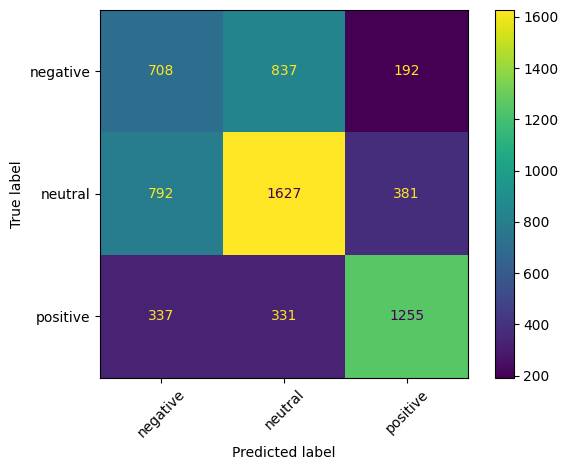

Accuracy : 0.5557
Precision: 0.5514
Recall   : 0.5471
F1       : 0.5490


In [ ]:
label_indices = list(range(len(classes)))

cm = confusion_matrix(targets, predictions, labels=label_indices)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.show()

precision = precision_score(targets, predictions, average="macro")
recall = recall_score(targets, predictions, average="macro")
f1 = f1_score(targets, predictions, average="macro")
accuracy = accuracy_score(targets, predictions)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1       : {f1:.4f}")


# Export the model

In [ ]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
from google.colab import files
files.download("model.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>